In [1]:
# %load_ext autoreload
# %autoreload 2

In [1]:
import lib.preprocessing as pre

In [2]:
import lib.effects as fx

In [3]:
import librosa

In [4]:
path = '../Downloads/audio_data'

In [5]:
files = pre.full_file_scraper(path)

In [18]:
files[0]

'../Downloads/audio_data/drums.wav'

In [6]:
signals = [librosa.load(file, sr=44100)[0] for file in files]

## Equalization

In [8]:
bins = [0, 300, 1200, 2400, 5000, 10000, 20000]

In [9]:
EQ_dict = {"n_fft": 1024, "window_size":1024, "hop_length":1024,
          "peak": -12, "bins": bins, "roll_percent": 0.95, "seconds":10,
          "rank_threshold":10, "max_n":3, "min_overlap_ratio": 0.1, "max_eq":3}

In [10]:
f0 = fx.EQSignal(path=files[0], signal=signals[0], n_fft=EQ_dict["n_fft"], 
                 window_size=EQ_dict["window_size"], hop_length=EQ_dict["hop_length"], 
                 peak=EQ_dict["peak"], bins=EQ_dict["bins"], 
                 roll_percent=EQ_dict["roll_percent"], seconds=EQ_dict["seconds"], 
                 rank_threshold=EQ_dict["rank_threshold"], max_n=EQ_dict["max_n"], 
                 min_overlap_ratio=EQ_dict["min_overlap_ratio"], max_eq=EQ_dict["max_eq"])

In [13]:
f0.norm_fft_db[0][0:5]

array([54.05466 , 54.038883, 54.097702, 54.080185, 54.066578],
      dtype=float32)

In [11]:
f1 = fx.EQSignal(path=files[1], signal=signals[1], n_fft=EQ_dict["n_fft"], 
                 window_size=EQ_dict["window_size"], hop_length=EQ_dict["hop_length"], 
                 peak=EQ_dict["peak"], bins=EQ_dict["bins"], 
                 roll_percent=EQ_dict["roll_percent"], seconds=EQ_dict["seconds"], 
                 rank_threshold=EQ_dict["rank_threshold"], max_n=EQ_dict["max_n"], 
                 min_overlap_ratio=EQ_dict["min_overlap_ratio"], max_eq=EQ_dict["max_eq"])

f2 = fx.EQSignal(path=files[2], signal=signals[2], n_fft=EQ_dict["n_fft"], 
                 window_size=EQ_dict["window_size"], hop_length=EQ_dict["hop_length"], 
                 peak=EQ_dict["peak"], bins=EQ_dict["bins"], 
                 roll_percent=EQ_dict["roll_percent"], seconds=EQ_dict["seconds"], 
                 rank_threshold=EQ_dict["rank_threshold"], max_n=EQ_dict["max_n"], 
                 min_overlap_ratio=EQ_dict["min_overlap_ratio"], max_eq=EQ_dict["max_eq"])

f3 = fx.EQSignal(path=files[3], signal=signals[3], n_fft=EQ_dict["n_fft"], 
                 window_size=EQ_dict["window_size"], hop_length=EQ_dict["hop_length"], 
                 peak=EQ_dict["peak"], bins=EQ_dict["bins"], 
                 roll_percent=EQ_dict["roll_percent"], seconds=EQ_dict["seconds"], 
                 rank_threshold=EQ_dict["rank_threshold"], max_n=EQ_dict["max_n"], 
                 min_overlap_ratio=EQ_dict["min_overlap_ratio"], max_eq=EQ_dict["max_eq"])

In [12]:
fx0 = f0.eq_params([f1, f2, f3])

In [13]:
x0 = f0.equalization(fx0, Q=2)

Pyo warning: Portaudio input device `G Money Bose` has fewer channels (1) than requested (2).
Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
plt.plot(x0)

NameError: name 'plt' is not defined

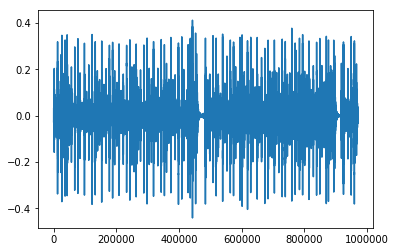

In [17]:
plt.plot(f0.signal)

In [14]:
x0

array([-0.0000000e+00, -2.0662928e-06,  6.8900144e-06, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32)

In [15]:
f0.signal

array([-0.0274692 , -0.00899946,  0.01513943, ...,  0.00727806,
       -0.00304722, -0.00551172], dtype=float32)

In [18]:
import IPython.display as ipd

In [16]:
ipd.Audio(x0, rate=44100)

In [ ]:
x0

In [13]:
f1.eq_params([f0, f2, f3])

0.0
0.0
0.0


[[18445.559624851816, 0.71, 2], [300, 0.71, 1]]

In [14]:
f2.eq_params([f0, f1, f3])

0.0
0.0
0.0


[[12169.844851076792, 0.71, 2], [300, 0.71, 1]]

In [ ]:
f3.eq_params([f0, f1, f2])

In [14]:
type(EQ_dict["max_n"])

int

## Compression

In [8]:
cd = {"n_fft": 1024, "window_size":1024, "hop_length":1024,
      "peak": -12, "time_constant": 0.200, "order": 1,
      "cutoff": 1000, "std": 2, "attack_max": 0.08, "release_max": 1.0}

In [9]:
Cs = [fx.CompressSignal(file, signal, cd["n_fft"], cd["window_size"], cd["hop_length"],
                    cd["peak"], cd["time_constant"], cd["order"], cd["cutoff"], cd["std"],
                    cd["attack_max"], cd["release_max"]) for file, signal in zip(files, signals)]

In [10]:
cfs = [C.crest_factor for C in Cs]
lfes = [C.lfe for C in Cs]

In [11]:
sg = fx.SignalAggregator(44100, 4)

In [12]:
lfa = sg.lfa(lfes)
cfa = sg.cfa(cfs)

In [13]:
Cs[0].comp_params(cfa, lfa)

[-31.448841476541915,
 2.302011449305387,
 0.06923706978147162,
 0.8654633722683953,
 15.724420738270958]

## Fader

In [7]:
fd = {"n_fft": 1024, "window_size":1024, "hop_length":1024,
      "peak": -12, "decay": 0.9, "step": 3, "lead": False, "B": 1}

In [8]:
ld = {"holdtime": 0.05, "ltrhold": -30, "utrhold":-25, "release": 0.05,
     "attack": 0.01}

In [9]:
Fs = [fx.FaderSignal(file, signal, fd["n_fft"], fd["window_size"],
                    fd["hop_length"], fd["peak"], fd["decay"], fd["step"],
                     fd["lead"], fd["B"]) for file, signal in zip(files, signals)]

In [10]:
Fs[0].sr

44100

In [11]:
Fs[0].lead

False

In [10]:
Ls = [F.full_loudness() for F in Fs]

In [11]:
sg = fx.SignalAggregator(44100, 4)

In [12]:
L_av = sg.loudness_avg(Ls, ld["holdtime"], ld["ltrhold"], ld["utrhold"], ld["release"], ld["attack"])

/Users/garrettransom/ravel_labs/lib/effects.py:296: RuntimeWarning: divide by zero encountered in true_divide
  L_av = np.where(gain_val > 0, L_c / gain_val, 0)


In [14]:
fo = Fs[0].compute_fader(L_av, Ls[0])

In [15]:
y0 = Fs[0].fader(fo)

In [21]:
y01 = Fs[0].signal * fo

In [16]:
import IPython.display as ipd

In [23]:
ipd.Audio(y01, rate=Fs[0].sr)

## Panning

In [8]:
cutoffs = [35, 80, 187.5, 375, 750, 1500, 3000, 6000]

In [9]:
pan_dict = {"n_fft": 1024, "window_size":1024, "hop_length":1024,
          "peak": -12, "cutoffs": cutoffs, "window":0.1, "order":2,
            "btype": "low"}

In [10]:
p0 = fx.PanSignal(path=files[0], signal=signals[0], n_fft=pan_dict["n_fft"], 
               window_size=pan_dict["window_size"], hop_length=pan_dict["hop_length"], 
               peak=pan_dict["peak"], cutoffs=pan_dict["cutoffs"], window=pan_dict["window"],
              order=pan_dict["order"], btype=pan_dict["btype"])

In [12]:
p0.lead_filter()

1500

In [11]:
p1 = fx.PanSignal(path=files[1], signal=signals[1], n_fft=pan_dict["n_fft"], 
               window_size=pan_dict["window_size"], hop_length=pan_dict["hop_length"], 
               peak=pan_dict["peak"], cutoffs=pan_dict["cutoffs"], window=pan_dict["window"],
              order=pan_dict["order"], btype=pan_dict["btype"])
p2 = fx.PanSignal(path=files[2], signal=signals[2], n_fft=pan_dict["n_fft"], 
               window_size=pan_dict["window_size"], hop_length=pan_dict["hop_length"], 
               peak=pan_dict["peak"], cutoffs=pan_dict["cutoffs"], window=pan_dict["window"],
              order=pan_dict["order"], btype=pan_dict["btype"])
p3 = fx.PanSignal(path=files[3], signal=signals[3], n_fft=pan_dict["n_fft"], 
               window_size=pan_dict["window_size"], hop_length=pan_dict["hop_length"], 
               peak=pan_dict["peak"], cutoffs=pan_dict["cutoffs"], window=pan_dict["window"],
              order=pan_dict["order"], btype=pan_dict["btype"])

In [12]:
signal_peaks = [x.lead_filter() for x in [p0, p1, p2, p3]]

In [16]:
signal_peaks

[1500, 375, 80, 750]

In [15]:
import numpy as np

In [20]:
K = np.unique(signal_peaks, return_inverse=True, return_counts=True)

In [28]:
K[2][0]

1

In [26]:
np.argwhere(K[1] == 3)[0][0]

0

In [35]:
list(np.argwhere(np.array(signal_peaks) == 750)[0])

[3]

In [13]:
sg = fx.SignalAggregator(44100, 4)

In [14]:
Ps = sg.panning_locations(cutoffs, signal_peaks)

In [18]:
Ps[3][1]

0.5

In [15]:
p0_fx = p0.pan(0.5)

Pyo warning: Portaudio input device `G Money Bose` has fewer channels (1) than requested (2).
Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


In [16]:
p0_fx

array([-0.000000e+00, -1.442988e-06,  4.854963e-06, ...,  0.000000e+00,
        0.000000e+00,  0.000000e+00], dtype=float32)

In [19]:
ipd.Audio(p0_fx, rate=44100)